## Prepare data and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def toSeconds(timestamp):
    hour = int(timestamp[0:2])
    minute = int(timestamp[3:5])
    second = float(timestamp[6:])
    return 3600*hour+60*minute+second

In [3]:
toSeconds('04:34:15.654')

16455.654

In [4]:
filepath_inf = 'data/sta/e4_content/int{number}_bloom_inf.csv'
filepath_dsi = 'data/sta/e4_content/int{number}_bloom_dsi.csv'
filepath_mad = 'data/sta/e4_content/int{number}_bloom_mad.csv'

In [5]:
column_list = ['In', 'Switch', 'Out', 'BT_Level', 'distances_0', 'distances_1', 'distances_2', 'DSI', 'MAD']

In [6]:
level_list = ["Knowledge", "Comprehension", "Application", "Analysis", "Synthesis", "Evaluation"]

In [7]:
def load_ds(number):
    file0 = pd.read_csv(filepath_inf.format(number=number), sep=',', index_col=0)
    file1 = pd.read_csv(filepath_dsi.format(number=number), sep=';', index_col=0)
    file2 = pd.read_csv(filepath_mad.format(number=number), sep=';', index_col=0)
    file0['DSI'] = file1.DSI
    file0['MAD'] = file2.MAD
    file0['In'] = file0['In'].apply(toSeconds)
    file0['Switch'] = file0['Switch'].apply(toSeconds)
    file0['Out'] = file0['Out'].apply(toSeconds)
    return file0[column_list]

In [8]:
load_ds(1)

,In,Switch,Out,BT_Level,distances_0,distances_1,distances_2,DSI,MAD
0,1.92,18.430,235.870,Comprehension,0.558366,0.459602,0.709632,0.813086,NaN
1,239.45,283.889,400.619,Synthesis,0.775218,0.725631,0.828373,0.820962,NaN
2,402.21,451.930,579.250,Evaluation,0.750378,0.759137,0.761368,0.836049,NaN
3,581.91,643.269,748.139,Analysis,0.714062,0.814368,0.799571,0.822306,0.945467
4,750.53,799.929,930.690,Analysis,0.815594,0.743005,0.924465,0.808773,0.941266
5,932.31,984.730,1121.849,Analysis,0.719582,0.782763,0.804667,0.816643,0.940693
6,1121.85,1182.530,1272.970,Analysis,0.883112,0.809205,0.924233,0.810511,0.934286
7,1274.69,1329.770,1357.010,Comprehension,0.888029,0.895529,0.893276,0.805072,NaN
8,1359.59,1434.070,1524.349,Analysis,0.760261,0.743158,0.810050,0.826340,0.943232
9,1528.63,1643.579,1855.799,Analysis,0.931294,0.860527,0.959716,0.816948,0.949618


In [9]:
level_colors = ['#80ff00', '#00ff80', '#0080ff', '#8000ff', '#ff0080', '#ff8000']

In [10]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=level_color, lw=4) for level_color in level_colors]

# Timeline-information landscapes

In [13]:
def landscape(number):
    plt.figure(figsize=(7, 4))
    ds = load_ds(number)
    previous_x, previous_y = None, None
    for idx, row in ds.iterrows():
        if idx != 0:
            x, y = [previous_x, row.In], [previous_y, row.DSI]
            plt.plot(x, y, linestyle='dotted', marker=',', c='#c0c0c0')
        colour = level_colors[level_list.index(row.BT_Level)]
        x, y = [row.In, row.Out], [row.DSI, row.DSI]
        plt.plot(x, y, marker='o', c=colour)
        previous_x, previous_y = row.Out, row.DSI
    plt.xlabel('Time')
    plt.ylabel('DSI')
    plt.legend(custom_lines, level_list)
    plt.title(f'Interview #{number}: information landscape')
    plt.show()

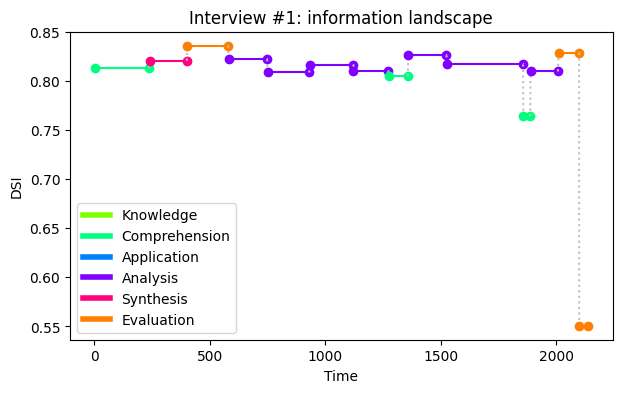

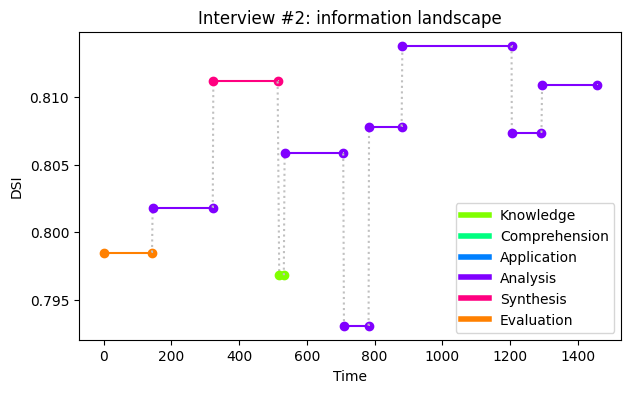

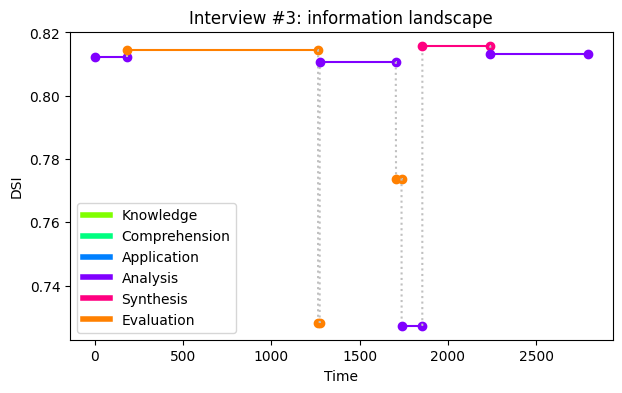

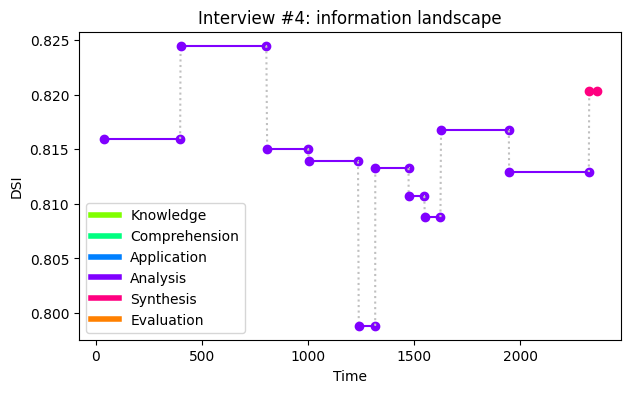

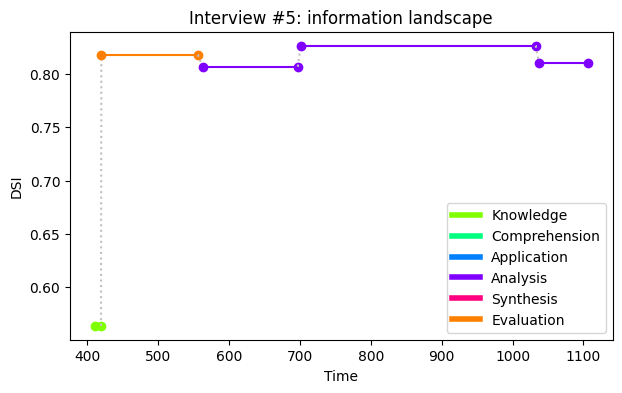

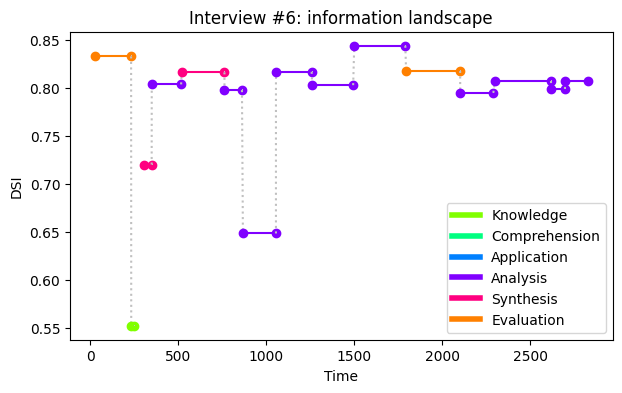

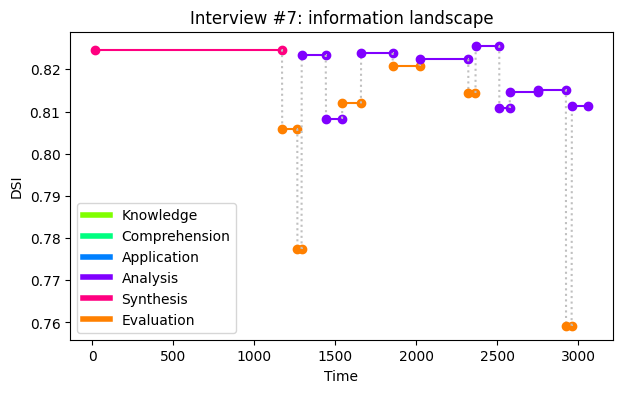

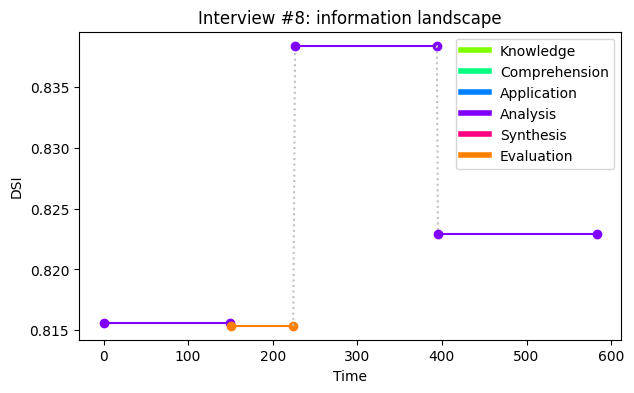

In [14]:
for number in range(1, 9):
    landscape(number)